In [164]:
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import pandas as pd
RT = pd.read_csv('Rottentomatoes.csv')

In [64]:
RT.shape

(10180, 10)

In [65]:
RT.dtypes

aud_score       object
context         object
critic_score    object
fresh_rot       object
genre           object
media           object
movie_url       object
name            object
reviewer        object
top_critic        bool
dtype: object

In [66]:
RT.sample(10)

,aud_score,context,critic_score,fresh_rot,genre,media,movie_url,name,reviewer,top_critic
1602,80%,Sometimes drifts into the emotional shallows r...,81%,rotten,"Drama,Kids & Family","Vue Weekly (Edmonton, Alberta)",https://www.rottentomatoes.com/m/dolphin_tale,Dolphin Tale,Brian Gibson,False
6236,82%,From a studio that's decimated iconic fairy ta...,87%,fresh,"Action & Adventure,Animation,Kids & Family",LivePDX,https://www.rottentomatoes.com/m/kung_fu_panda,Kung Fu Panda,Kimberly Gadette,False
9087,66%,Sometimes you just like a movie even though it...,71%,fresh,Horror,Reno News and Review,https://www.rottentomatoes.com/m/happy_death_day,Happy Death Day,Bob Grimm,False
9782,61%,American Pie is the latest in a long tradition...,61%,rotten,Comedy,Looking Closer,https://www.rottentomatoes.com/m/american_pie,American Pie,Jeffrey Overstreet,False
7809,87%,"By the end, directors/writers Phil Lord & Chri...",95%,rotten,"Action & Adventure,Animation,Comedy,Kids & Family",Assignment X,https://www.rottentomatoes.com/m/the_lego_movie,The LEGO Movie,Abbie Bernstein,False
9196,92%,"Outre, cheerful, yes... but wake me up when th...",91%,rotten,"Action & Adventure,Science Fiction & Fantasy",Observer (UK),https://www.rottentomatoes.com/m/guardians_of_...,Guardians of the Galaxy,Jonathan Romney,False
2956,76%,The real star of this show is Bo Welch whose p...,77%,fresh,"Action & Adventure,Drama,Science Fiction & Fan...",Mark Leeper's Reviews,https://www.rottentomatoes.com/m/thor,Thor,Mark R. Leeper,False
2430,81%,"""Hunger Games"" should kick an audience directl...",84%,fresh,"Drama,Mystery & Suspense,Science Fiction & Fan...","Journal and Courier (Lafayette, IN)",https://www.rottentomatoes.com/m/the_hunger_games,The Hunger Games,Bob Bloom,False
77,68%,"Shut out the massive hype, admittedly easier s...",77%,fresh,"Action & Adventure,Mystery & Suspense,Science ...",Washington Times,https://www.rottentomatoes.com/m/cloverfield,Cloverfield,Christian Toto,False
5884,86%,Johnny Depp plays Jack Sparrow as if Errol Fly...,79%,fresh,"Action & Adventure,Science Fiction & Fantasy",Film Snobs,https://www.rottentomatoes.com/m/pirates_of_th...,Pirates of the Caribbean: The Curse of the Bla...,Stephen Himes,False


In [67]:
RT.context = RT.context.fillna('')

In [68]:
import re
# Convert all the string to lower cases
RT.context = RT.context.str.lower()
# \S+ means anything that is not an empty space
RT.context = RT.context.apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
RT.context = RT.context.apply(lambda x: re.sub('\s+', ' ', x))

In [109]:
RT.critic_score = RT.critic_score.str.replace('%','').apply(int)
RT.aud_score = RT.aud_score.str.replace('%','').apply(int)

In [145]:
RT.sample(10)

,aud_score,context,critic_score,fresh_rot,genre,media,movie_url,name,reviewer,top_critic
3403,67,parents thrill see childhood hero full liveact...,90,fresh,"Action & Adventure,Mystery & Suspense,Science ...",eFilmCritic.com,https://www.rottentomatoes.com/m/spiderman,Spider-Man,Scott Weinberg,False
4118,78,get isnt dismantled rearranged puzzlepiece nar...,77,rotten,"Action & Adventure,Drama,Mystery & Suspense",Dallas Observer,https://www.rottentomatoes.com/m/sin_city,Sin City,Robert Wilonsky,False
1257,90,ryan reynolds born damn lab play role tj mille...,84,fresh,"Action & Adventure,Comedy,Science Fiction & Fa...",The Mary Sue,https://www.rottentomatoes.com/m/deadpool,Deadpool,Rebecca Pahle,False
8990,62,goofy fun blatant cashin ought,77,fresh,"Horror,Kids & Family,Mystery & Suspense",Time Out,https://www.rottentomatoes.com/m/goosebumps_2015,Goosebumps,Tom Huddleston,True
2804,62,animated feature great scenes young children s...,73,fresh,"Animation,Comedy",John Hanlon Reviews,https://www.rottentomatoes.com/m/the_secret_li...,The Secret Life of Pets,John Hanlon,False
7130,67,mcquarrie deftly intermixes observations human...,63,fresh,"Drama,Mystery & Suspense",The Film Yap,https://www.rottentomatoes.com/m/jack_reacher,Jack Reacher,Nick Rogers,False
5016,86,best buddycop ever,83,fresh,"Action & Adventure,Drama",sbs.is,https://www.rottentomatoes.com/m/lethal_weapon,Lethal Weapon,Stefan Birgir Stefansson,False
1581,80,could accused mawkishness problem recommending...,81,fresh,"Drama,Kids & Family","Commercial Appeal (Memphis, TN)",https://www.rottentomatoes.com/m/dolphin_tale,Dolphin Tale,John Beifuss,False
10027,91,doesnt great provide great experience,92,fresh,"Action & Adventure,Science Fiction & Fantasy",Projection Booth,https://www.rottentomatoes.com/m/marvels_the_a...,Marvel's The Avengers,Rob Humanick,False
10179,94,undeniably greatest 1980s indeed back future e...,96,fresh,"Action & Adventure,Comedy,Science Fiction & Fa...",What Culture,https://www.rottentomatoes.com/m/back_to_the_f...,Back to the Future,Shaun Munro,False


In [111]:
RT.context = RT.context.apply(lambda x: re.sub('[^\w\s]', '', x))

In [179]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop2 = ['one','movie','film','make','movies','films','time','genre','full  review','makes','way','much','many','good',\
        'review spanish','even','spanish','still','remake','made','take','thats','really','us','never','may'] 
stop += stop2

In [180]:
RT.context = RT.context.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [181]:
RT_horror = RT[RT.genre.str.find('Horror')!=-1]
RT_romance = RT[RT.genre.str.find('Romance')!=-1]
RT_comedy = RT[RT.genre.str.find('Comedy')!=-1]
RT_aa = RT[RT.genre.str.find('Action & Adventure')!=-1]

In [184]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(RT_aa.context))

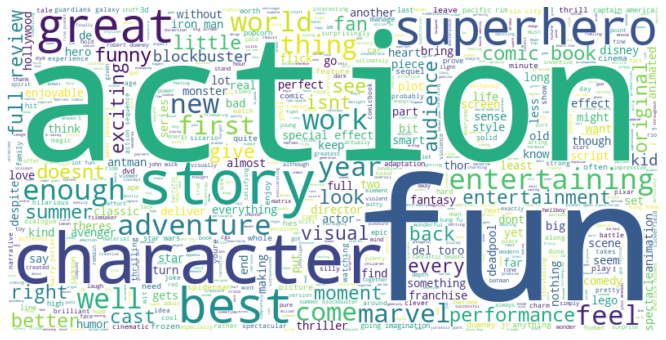

In [185]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
fresh_df = RT[RT.fresh_rot == 'fresh']
rotten_df = RT[RT.fresh_rot != 'fresh']

In [132]:
fresh_df.shape
rotten_df.shape

(1763, 10)

In [128]:
def sentiment_func(x):
    sentiment = TextBlob(x['context'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

fresh = fresh_df.apply(sentiment_func, axis=1)

Text(0.5, 0, 'Critic score')

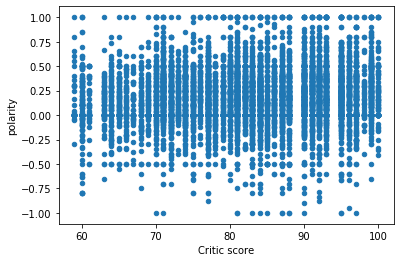

In [187]:
fresh.plot.scatter('critic_score', 'polarity')
plt.xlabel('Critic score')

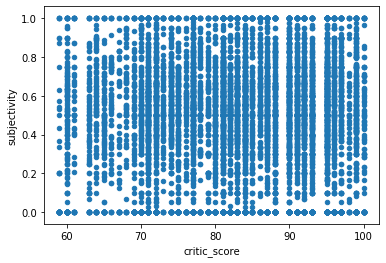

In [130]:
fresh.plot.scatter('critic_score', 'subjectivity')

In [125]:
rotten = rotten_df.apply(sentiment_func, axis=1)

Text(0.5, 0, 'Critic score')

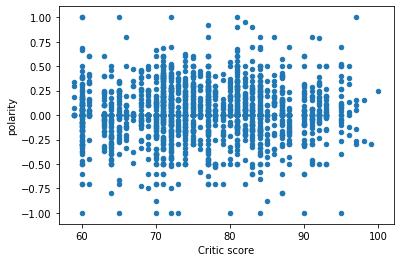

In [186]:
rotten.plot.scatter('critic_score', 'polarity')
plt.xlabel('Critic score')

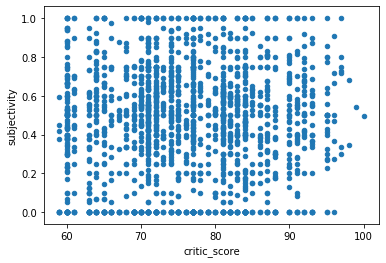

In [133]:
rotten.plot.scatter('critic_score', 'subjectivity')

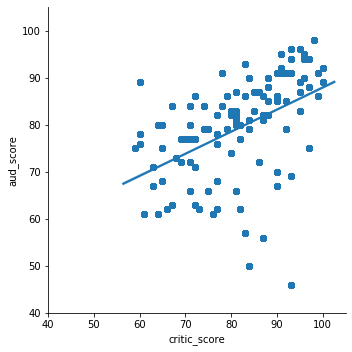

In [170]:
g = sns.lmplot("critic_score", "aud_score", RT)
g.set(ylim=(40, 105),xlim=(40,105))
plt.xlabel('Critic score')
plt.ylabel('Audience score')